Para a questão de **Estatística para Ciências de Dados** e **Aprendizado Dinâmico**, sugerem-se alguns comandos e passos em Python a seguir. Outros comandos podem ser usados conforme a necessidade.

**Algumas instruções**

- Salve este arquivo .ipynb e os dados indicados no enunciado da sua questão no moodle na mesma pasta na sua máquina local.

- Responda às questões no moodle com base nos resultados obtidos nas suas análises. 

- Você deverá fazer o upload do arquivo de notebook .ipynb para conferência posterior, nos casos em que as correções automatizadas configuradas no sistema não levem em consideração diferentes versões do mesmo método estatístico implementadas em Python.

Boa prova!

Mariana e Cibele

In [1]:
# Instale os pacotes abaixo nas versões indicadas

#!pip install statsmodels==0.11.1
#!pip install scipy==1.4.1
#!pip install pmdarima==1.7.1

In [2]:
# Carregue as bibliotecas 

import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error

from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.formula.api import ols

import statsmodels as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tools.eval_measures import rmse

from pmdarima import auto_arima

import seaborn as sns

**Baixe os dados indicados no link indicado no enunciado da sua questão no moodle e salve como 'dados.csv'**

As variáveis da base de dados são

Y: produção mensal de grãos (toneladas)

X: tempo desde o início do registro (meses)

D: 0, se a observação faz parte das 10 primeiras décadas e 1 se faz parte das 10 últimas décadas 

In [3]:
dados = pd.read_csv('dados.csv',index_col=0)
dados.head()

,X,Y,D
1980-01-31,0.0,0.572232,0.0
1980-02-29,1.0,2.425839,0.0
1980-03-31,2.0,3.847004,0.0
1980-04-30,3.0,2.933853,0.0
1980-05-31,4.0,7.916690,0.0


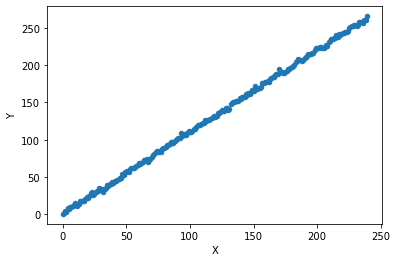

In [4]:
dados.plot.scatter('X','Y')

In [31]:
#média agrupada por anos
print(dados.groupby('D')['Y'].mean())
print()
print('...10 últimas décadas detectou um aumento importante da produção, com média mensal de',dados.groupby('D')['Y'].mean()[0],'toneladas')
print('...para a década de 80, e ',dados.groupby('D')['Y'].mean()[1],'toneladas, para a década de 90 (teste t de Student para amostras independentes, supondo-se variâncias equivalentes: p-valor<0,001)')

D
0.0     66.435591
1.0    198.331314
Name: Y, dtype: float64

...10 últimas décadas detectou um aumento importante da produção, com média mensal de 66.43559135753982 toneladas
...para a década de 80, e  198.331313924806 toneladas, para a década de 90 (teste t de Student para amostras independentes, supondo-se variâncias equivalentes: p-valor<0,001)


**Teste t de Student (bicaudal) para média de duas populações Normais com variâncias diferentes.**

**Comando sugerido: stats.ttest_ind**

**A variável D indica se a observação faz parte das 10 primeiras ou 10 últimas décadas.**

In [28]:
tst_stat, tst_p = stats.ttest_ind(dados[dados['D']==0]['Y'],dados[dados['D']==1]['Y'])

print('estatistica',tst_stat)
print('p-valor:',tst_p)

estatistica -26.701300043027956
p-valor: 1.5364677796402854e-73


**Teste de Levene**

**Comando sugerido: stats.levene**

In [29]:
lv_stat, lv_p = stats.levene(dados[dados['D']==0]['Y'],dados[dados['D']==1]['Y'])
lv_res = 'Não existe grande diferença na variância.' if lv_p > 0.05 else 'Existe diferença na variância.'
print('Resultado:',lv_p)
print(lv_res)
print()
print('...em ambas as décadas (teste de Levene: p-valor=',lv_p)

Resultado: 0.8788840646705208
Não existe grande diferença na variância.

...em ambas as décadas (teste de Levene: p-valor= 0.8788840646705208


**Ajuste o modelo de regressão linear simples** 

**Comando sugerido: ols**

In [10]:
mod = ols('Y ~ X',data=dados)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.638e+05
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:57:13   Log-Likelihood:                -471.40
No. Observations:                 240   AIC:                             946.8
Df Residuals:                     238   BIC:                             953.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0459      0.223      4.692      0.0

In [39]:
print('Para a equação pegar os coeficientes do intercepto do modelo OLS e do coeficiente do valor de X')
print('y.chapeu = 1.05+1.10x.')

Para a equação pegar os coeficientes do intercepto do modelo OLS e do coeficiente do valor de X
y.chapeu = 1.05+1.10x.


In [45]:
aumento = 1.0991 - 1
print('Resumidamente, pode-se dizer que houve um aumento de aproximadamente', aumento * 100, '%')

Resumidamente, pode-se dizer que houve um aumento de aproximadamente 9.909999999999997 %


In [11]:
# Calcule os valores preditos de E(Y)
ypred=res.fittedvalues

# Obtenha o resíduo = observado-ajustado
residuo = res.resid

dados['residuo'] = residuo

In [84]:
mes = (132.92 - 1.05)/1.10
print('Valor previsto na equação:', mes)
print('Buscando o mês previsto no dataframe:',dados.index[120])
print('Por exemplo, no mês de janeiro de 1990, a produção predita é de 132,92 toneladas')

Valor previsto na equação: 119.88181818181815
Buscando o mês previsto no dataframe: 1990-01-31
Por exemplo, no mês de janeiro de 1990, a produção predita é de 132,92 toneladas


In [87]:
print('...o que pode ser evidenciado pelo gráfico de resíduos abaixo:')

...o que pode ser evidenciado pelo gráfico de resíduos abaixo:


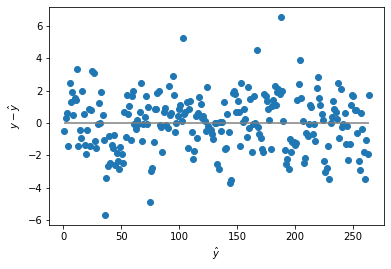

In [12]:
plt.scatter(ypred, residuo)
plt.xlabel('$\hat{y}$')
plt.ylabel('$y-\hat{y}$')
plt.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')

In [88]:
print('...sugere a existência de correlação...')

...sugere a existência de correlação...


**Verifique a suposição de distribuição Normal dos resíduos**

**Comando sugerido: stats.probplot**

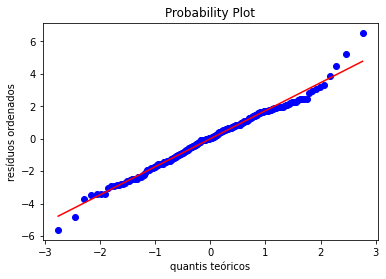

Index(['1982-09-30', '1982-10-31', '1982-11-30', '1983-01-31', '1983-05-31',
       '1983-07-31', '1983-08-31', '1983-11-30', '1985-08-31', '1985-09-30',
       '1985-10-31', '1988-06-30', '1990-01-31', '1990-02-28', '1990-11-30',
       '1990-12-31', '1994-07-31', '1994-08-31', '1994-09-30', '1995-09-30',
       '1995-10-31', '1997-01-31', '1997-02-28', '1997-03-31', '1997-05-31',
       '1998-08-31', '1999-04-30', '1999-05-31', '1999-09-30'],
      dtype='object') Index(['1980-05-31', '1980-11-30', '1981-11-30', '1981-12-31', '1985-01-31',
       '1986-11-30', '1987-02-28', '1987-10-31', '1989-05-31', '1991-08-31',
       '1992-01-31', '1992-08-31', '1993-10-31', '1994-01-31', '1994-03-31',
       '1995-05-31', '1995-06-30', '1996-07-31', '1996-08-31', '1997-12-31',
       '1998-02-28'],
      dtype='object')


In [18]:
# diagnóstico de normalidade
stats.probplot(dados['residuo'], plot=plt)
plt.xlabel('quantis teóricos')
plt.ylabel('resíduos ordenados')
plt.show()
print(dados.index[dados['residuo']<-2],dados.index[dados['residuo']>2])

**Verifique os gráficos de autocorrelação e autocorrelação parcial dos resíduos.** 

**Comandos sugeridos: plot_acf e plot_pacf**

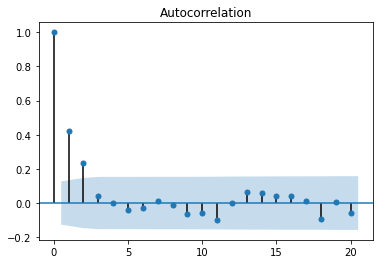

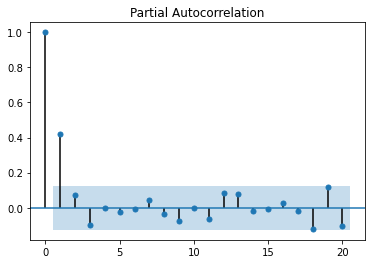

In [19]:
lags=20
plot_acf(dados['residuo'],lags=lags);
plot_pacf(dados['residuo'],lags=lags);

**Indique qual a ordem mais adequada de um modelo ARIMA(p,d,q) para os resíduos.**

**Use a função auto_arima e stepwise, como feito em aula.**

In [90]:
# aplicando stepwise para selecionar o melhor modelo SARIMA
auto_arima(dados['residuo'],seasonal=True,m=12).summary()

stepwise_fit = auto_arima(dados['residuo'], start_p=0, start_q=0,max_p=6,max_q=3,m=12,
                          seasonal=True,
                          trace=True,
                          error_action='ignore',
                          supress_warnings=True,
                          stepwise=True)

stepwise_fit.summary()

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=949.259, Time=0.81 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=946.792, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=904.134, Time=0.39 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=915.910, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=944.792, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=902.206, Time=0.11 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=904.134, Time=0.29 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=906.134, Time=0.66 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=903.081, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=903.450, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=913.971, Time=0.11 sec


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=903.608, Time=0.34 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=900.207, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12]             : AIC=902.134, Time=0.13 sec
 ARIMA(1,0,0)(0,0,1)[12]             : AIC=902.135, Time=0.17 sec
 ARIMA(1,0,0)(1,0,1)[12]             : AIC=904.134, Time=0.58 sec
 ARIMA(2,0,0)(0,0,0)[12]             : AIC=901.082, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[12]             : AIC=901.450, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[12]             : AIC=911.971, Time=0.06 sec


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,0,1)(0,0,0)[12]             : AIC=901.608, Time=0.26 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12]          
Total fit time: 5.159 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -448.103
Date:                Sat, 12 Dec 2020   AIC                            900.207
Time:                        16:55:28   BIC                            907.168
Sample:                             0   HQIC                           903.012
                                - 240                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4200      0.061      6.877      0.000       0.300       0.540
sigma2         2.4486      0.180     13.586      0.000       2.095       2.802
===================================================================================
Ljung-Box (Q):                       49.55   Jarque-Bera (JB):                13.08
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             0.19
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
#ARIMA(1,0,0)(0,0,0)[12]
#- Componente não sazonal autorregressiva de ordem 1
#- Sem Componente não sazonal integrado
#- Sem Componente não sazonal de médias móveis
#- Sem Componente sazonal autorregressiva de primeira ordem com período 12
#- Sem componente sazonal integrada
#- Sem componente sazonal de média móvel

print('..., observou-se a ordem 1, 0, 0, o que confirma os gráficos de autocorrelação e autocorrelação parcial dos resíduos')

..., observou-se a ordem 1, 0, 0, o que confirma os gráficos de autocorrelação e autocorrelação parcial dos resíduos


**Divida a base em treino e teste, separando 80% das observações para treino.**

In [93]:
print('foi dividida em bases de treino e teste...')

foi dividida em bases de treino e teste...


In [97]:
dados_treino = dados.iloc[:round((len(dados) * 0.8))]
dados_teste = dados.iloc[round((len(dados) * 0.8)):] 

In [95]:
print('...com 80% das observações para a base de treino, ou seja,',len(dados_treino))

...com 80% das observações para a base de treino, ou seja, 192


**Obtenha a ordem do melhor modelo ARIMA (p,d,q) para a variável resposta Y considerando somente a base de treino.**


In [102]:
# aplicando stepwise para selecionar o melhor modelo SARIMA
auto_arima(dados_treino['Y'],seasonal=True,m=12).summary()

stepwise_fit = auto_arima(dados_treino['Y'], start_p=0, start_q=0,max_p=6,max_q=3,m=12,
                          seasonal=True,
                          trace=True,
                          error_action='ignore',
                          supress_warnings=True,
                          stepwise=True)

stepwise_fit.summary()

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\ProgramData\Anaconda3\lib\site-packages\sta

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=793.802, Time=1.60 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=790.730, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=771.689, Time=0.78 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=757.251, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=843.844, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=755.395, Time=0.19 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=757.258, Time=0.51 sec


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=2.07 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=769.986, Time=0.07 sec


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=845.843, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12] intercept
Total fit time: 9.074 seconds


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  192
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -374.697
Date:                Sat, 12 Dec 2020   AIC                            755.395
Time:                        17:08:06   BIC                            765.152
Sample:                             0   HQIC                           759.347
                                - 192                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.0942      0.044     24.950      0.000       1.008       1.180
ma.L1         -0.6497      0.057    -11.490      0.000      -0.761      -0.539
sigma2         2.9529      0.264     11.204      0.000       2.436       3.469
===================================================================================
Ljung-Box (Q):                       60.18   Jarque-Bera (JB):                 3.32
Prob(Q):                              0.02   Prob(JB):                         0.19
Heteroskedasticity (H):               1.41   Skew:                            -0.06
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [104]:
#	SARIMAX(0, 1, 1)
#- Sem Componente não sazonal autorregressiva
#- Componente não sazonal integrado de ordem 1
#- Componente não sazonal de médias móveis de ordem 1

print('Isso significa que o modelo escolhido possui componentes integrados')

Isso significa que o modelo escolhido possui componentes integrados


**Obtenha o erro quadrático médio das previsões das observações da base de teste.**

In [110]:
#predição utilizando o modelo SARIMA identificado pelo stepwise
modelo = SARIMAX(dados_treino['Y'], order=(0,1,1))
resultado = modelo.fit()

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [111]:
inicio=len(dados_treino)
fim=len(dados_treino)+len(dados_teste)-1

previsões = resultado.predict(start=inicio, end=fim, dynamic=False, typ='levels')
previsões.index = dados_teste.index

In [112]:
error = rmse(dados_teste['Y'], previsões)
error

31.351221569508574

In [113]:
print('...a raiz quadrática do erro quadrático médio, RMSE, obtém-se',error)

...a raiz quadrática do erro quadrático médio, RMSE, obtém-se 31.351221569508574
